In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

In [ ]:
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

In [ ]:
crabs_data.describe()

,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


#Scaled data

In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])


In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale


In [ ]:
crabs_min_max.describe()

,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,0.527233,0.455365,0.529043,0.515053,0.511645
std,14.467083,0.219832,0.187835,0.216382,0.209919,0.220953
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.358491,0.328467,0.382219,0.384000,0.341935
50%,25.500000,0.525157,0.459854,0.528875,0.525333,0.503226
75%,38.000000,0.682390,0.569343,0.684650,0.664000,0.677419
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

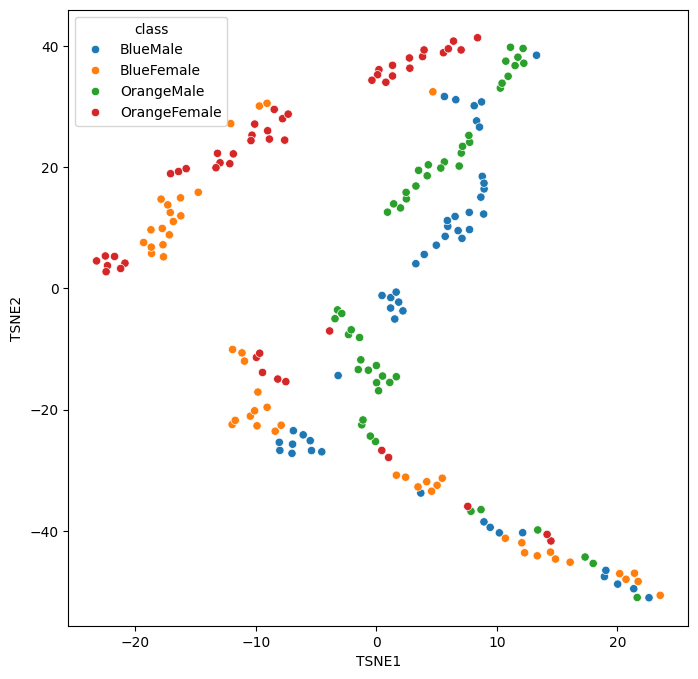

In [ ]:
crabs_tsne = TSNE(n_components=2, perplexity=10,n_iter=1000,init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1','TSNE2',]] = crabs_tsne
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_min_max)

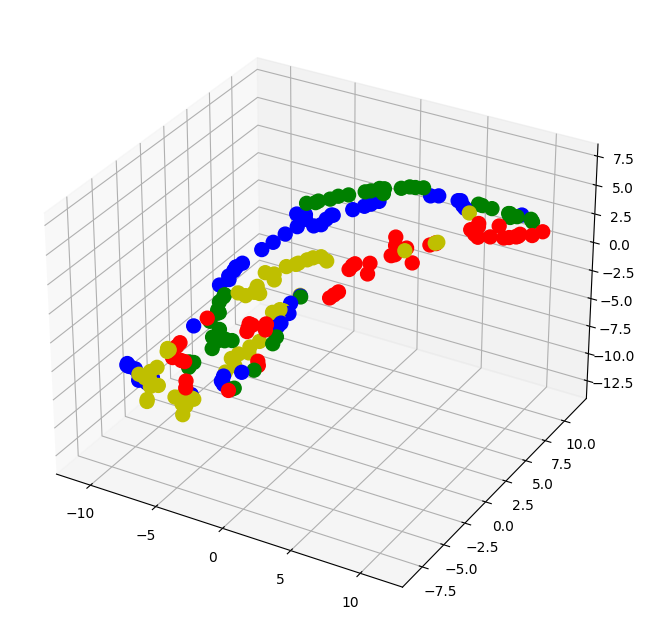

In [ ]:
crabs_tsne = TSNE(n_components=3, perplexity=10,n_iter=2000,init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1','TSNE2','TSNE3']] = crabs_tsne

colors_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
plt.scatter(crabs_min_max.TSNE1, crabs_min_max.TSNE2, zs=crabs_min_max.TSNE3,depthshade=False,
            c=crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)